## sw

Development of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \text{NetLW} ^ \prime + \hat{h^ \prime} \ \text{SEF} ^ \prime + \hat{h^ \prime} \ \textcolor{lightblue}{\text{NetSW}} ^ \prime - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

$\textcolor{lightblue}{\text{NetSW}} = \textcolor{lightblue}{\text{rsus}} - \textcolor{lightblue}{\text{rsds}} - \textcolor{lightblue}{\text{rsut}}$

In [16]:
import xarray as xr

import numpy as np
import skimage.measure as skm
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os

In [17]:
model='MPI-ESM1-2-HR'
experiment_id='historical'

In [18]:
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netsw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 384, time: 10957)
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Data variables:
    netsw    (time, lat, lon) float32 ...

### snapshots

In [19]:
netsw = ds.netsw
netsw

<xarray.DataArray 'netsw' (time: 10957, lat: 64, lon: 384)>
[269279232 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31

In [20]:
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()


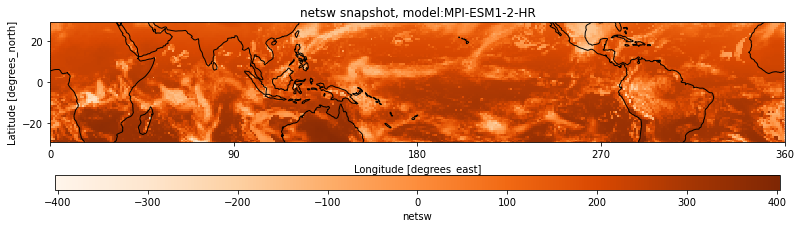

In [21]:
plot_snapshot(netsw.isel(time=0), 'Oranges', 'netsw', model)

In [22]:
netsw_mean = netsw.mean(dim=('lat','lon'))
np.shape(netsw_mean)

(10957,)

In [23]:
netsw_anom = netsw - netsw_mean
np.shape(netsw_anom)

(10957, 64, 384)

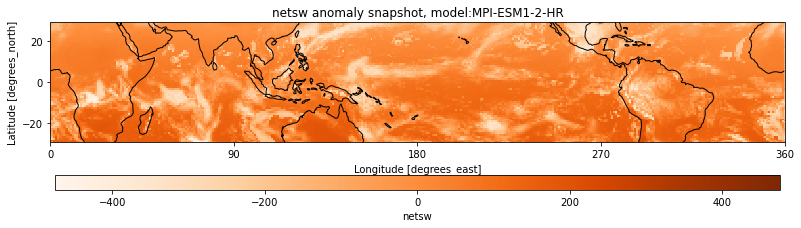

In [24]:
plot_snapshot(netsw_anom.isel(time=0), 'Oranges', 'netsw anomaly', model)

In [25]:
# print(np.shape(mse_anom))
# print(np.shape(netlw_anom))

### $\hat{h^ \prime} \ \text{NetSW}$

In [26]:
netsw_corr = mse_anom.data * netsw_anom.data
print(np.shape(netsw_corr))

NameError: name 'mse_anom' is not defined

In [ ]:
netsw_corr = xr.DataArray(
    data=netsw_corr[0:-1],
    dims=['time', 'lat', 'lon'],
    coords={'time': mse_anom.time.data[0:-1], 'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

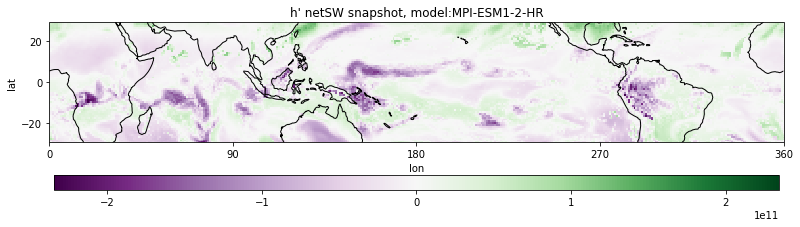

In [ ]:
plot_snapshot(netsw_corr.isel(time=0), 'PRGn', 'h\' netSW', model)

In [ ]:
netsw_corrsMean = netsw_corr.mean(dim=('lat','lon'))

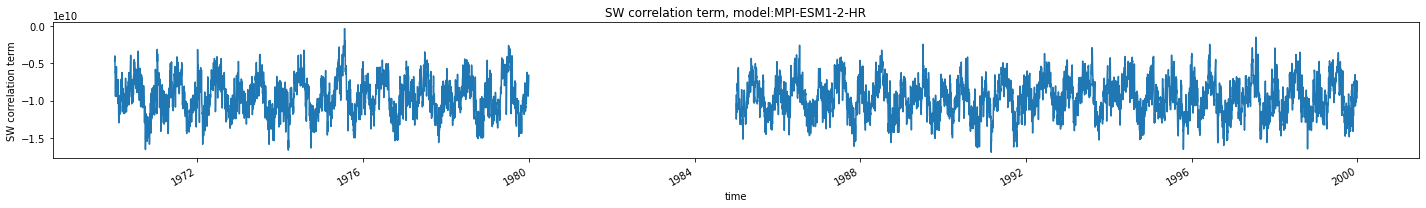

In [ ]:
plot_timeseries(netsw_corrsMean, 'SW correlation term', model)